<img src="https://www.ips.pt/ips_si/imagens/_ips-logotipo-site-2020" width="150" height="75">

# Introdução
Neste trabalho de pesquisa, exploramos o cenário dos **Facebook Live Sellers in Thailand**, focando em 10 vendedores tailandeses de moda e cosméticos. Nosso objetivo é entender como esses vendedores utilizam a plataforma do Facebook para impulsionar suas vendas, bem como analisar o engajamento dos usuários por meio de métricas como comentários, compartilhamentos e reações, likes.

Para atingir esse objetivo, coletamos dados das páginas do Facebook desses vendedores, incluindo informações sobre as publicações realizadas, como vídeos, fotos, status e links. Além disso, também capturamos métricas de engajamento, que são indicadores importantes para avaliar a receptividade e o interesse do público.

Neste estudo, vamos realizar uma análise exploratória desses dados, buscando insights sobre as estratégias dos Vendedores ao **Facebook Live Sellers in Thailand**. Vamos investigar a distribuição das diferentes categorias de publicações e examinar como o engajamento dos usuários varia entre os vendedores e tipos de publicações.


## Descrição do Trabalho
Este trabalho de Aprendizagem Automática tem como objetivo investigar o comportamento de vendedores tailandeses de moda e cosméticos que utilizam a plataforma do Facebook Live para promover seus produtos. O estudo se concentra em um conjunto de dados composto por 10 páginas de vendedores tailandeses, que apresentam uma variedade de publicações, incluindo vídeos, fotos, status e links.

A principal métrica utilizada para avaliar o engajamento dos usuários com essas páginas é uma combinação de comentários, compartilhamentos e reações. Para realizar uma análise abrangente dessas métricas, será aplicada uma técnica de aprendizado não supervisionado chamada clustering, com o objetivo de agrupar as publicações em categorias relevantes.

## Conjunto de dados utilizados
O conjunto de dados utilizado neste projeto consiste em informações coletadas de 10 páginas de vendedores tailandeses que utilizam o Facebook Live Sellers na Tailândia.

## Análise Exploratória
A análise exploratória de dados é uma etapa importante para compreender melhor o conjunto de dados e extrair informações relevantes. Os passos são os seguintes:
1. Carregar os dados em Python.
2. Verificar os dados em falta.
3. Identificação do número e tipo de característica.
4. Gráficos de distribuições.
5. Preenchimento dos dados faltantes.



### Carregar os dados em Python e Limpeza de Dados
Utilizamos a biblioteca **pandas** para carregar os dados do arquivo CSV em um DataFrame no Jupyter Notebook. Na qual o nome do arquivo é "Live_20210128.csv". Fizemos uma limpeza de dados, pois existiam colunas a mais, com valores nulos. Assim sendo, fizemos a remoção dessas colunas. Fizemos o pré-processamento dos dados da variavel categórica **status_type**, fizemos a limpeza de dados para a coluna do **status_published** e a também eliminamos a coluna do **status_type**.

Para clarificar a análise da tabela dos dados deixamos a abaixo a legenda do **status_type_codif** que é a nova coluna de status

1 - Photo<br>
2 - Status<br>
3 - Video<br>
4 - Link<br>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_dir = "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/"
df_live = pd.read_csv(data_dir + "Live_20210128.csv")

colunas_remove = ['Column1','Column2','Column3','Column4','status_published']
df_live = df_live.drop(colunas_remove, axis=1)
df_live['status_type_codif'] = label_encoder.fit_transform(df_live['status_type'])
coluna_remove=['status_type']
df_live = df_live.drop(coluna_remove, axis=1)

coluna_movida = df_live.pop('status_type_codif')
df_live.insert(1, 'status_type', coluna_movida)

df_live.head(10)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,529,512,262,432,92,3,1,1,0
1,2,1,150,0,0,150,0,0,0,0,0
2,3,3,227,236,57,204,21,1,1,0,0
3,4,1,111,0,0,111,0,0,0,0,0
4,5,1,213,0,0,204,9,0,0,0,0
5,6,1,217,6,0,211,5,1,0,0,0
6,7,3,503,614,72,418,70,10,2,0,3
7,8,3,295,453,53,260,32,1,1,0,1
8,9,1,203,1,0,198,5,0,0,0,0
9,10,1,170,9,1,167,3,0,0,0,0


### Verificar os dados em falta
Para verificar se existem dados faltantes no conjunto de dados, utilizamos o método **isnull()** seguido do método **sum()** para somar os valores nulos em cada coluna.<br>
Irá exibir a quantidade de valores nulos em cada coluna do DataFrame.


In [ ]:
missing_data = df_live.isnull().sum()
print(missing_data)

status_id        0
status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64


### Identificação do Número e Tipo de características
Para identificar o número e o tipo de características no conjunto de dados, utilizamos o atributo **shape** para obter o número de linhas (amostras) e colunas (características) e o atributo **dtypes** para obter os tipos de dados de cada coluna.<br>
O código também irá exibir o número de amostras.

In [ ]:
num_amostras, num_caracteristicas = df_live.shape
tipos_caracteristicas = df_live.dtypes

print("Número de amostras:", num_amostras)
print("Número de características:", num_caracteristicas)
print("Tipos de características:")
print(tipos_caracteristicas)

Número de amostras: 7050
Número de características: 11
Tipos de características:
status_id        int64
status_type      int64
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object


### Gráficos de Distribuições (Histograma)
Para criar gráficos de distribuição, como histogramas, escolhemos duas características do conjunto de dados e utilizamos a biblioteca **matplotlib** para plotar os gráficos. Utilizamos plot histogramas para as características **comentários** e **likes**.<br>
Fizemos 4 histogramas para cada tipo de "status", para uma melhor compreensão e análise do gráfico.

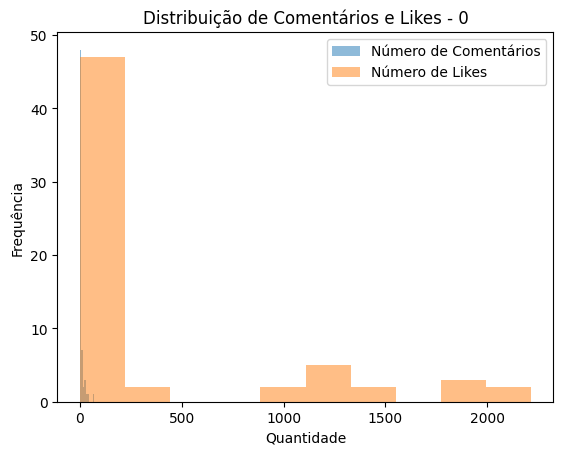

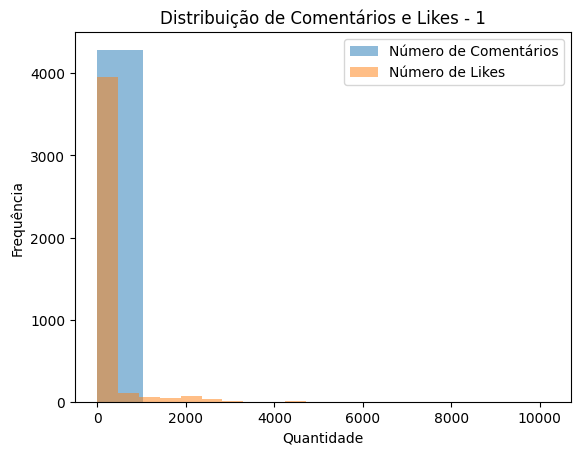

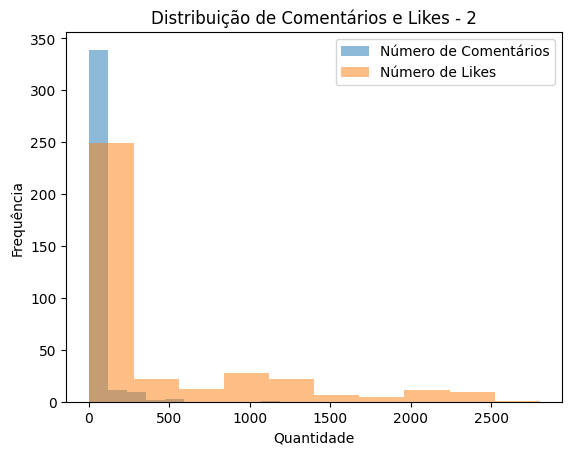

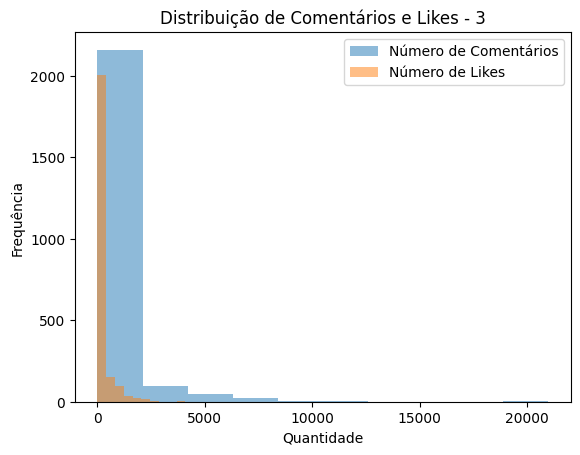

In [ ]:
import matplotlib.pyplot as plt

grouped_data = df_live.groupby('status_type')

for status_type_codif, group in grouped_data:
    plt.hist(group['num_comments'], bins=10, alpha=0.5, label='Número de Comentários')
    plt.hist(group['num_likes'], bins=10, alpha=0.5, label='Número de Likes')
    plt.xlabel('Quantidade')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição de Comentários e Likes - {status_type_codif}')
    plt.legend(loc='upper right')
    plt.show()

Iremos também realizar um **Histograma** para podermos visualizar qual é o status que a maioria dos vendedores utiliza para vender seus produtos no Facebook.

[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

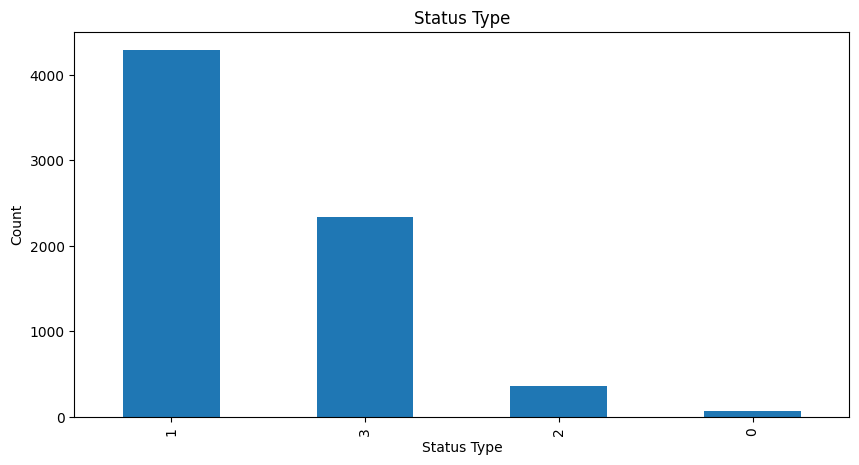

In [ ]:
st_ax = df_live.status_type.value_counts().plot(kind='bar',
                                                figsize=(10,5),
                                                title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Count")

Ao analisar o gráfico podemos concluir que a maioria dos vendedores parece estar a usar foto ou vídeo como status para a venda. Uma pequena parte dos usuários depende do status do texto ou URL/link para postar um anúncio.

### Preenchimento dos dados em falta
Para preencher os dados em falta, escolhemos uma estratégia adequada com base na natureza dos dados e no objetivo da análise. A nossa estratégia foi de substituir os valores falatantes pela **média**.

In [ ]:
data_filled = df_live.fillna(df_live.mean())
print(data_filled)


      status_id  status_type  num_reactions  num_comments  num_shares  \
0             1            3            529           512         262   
1             2            1            150             0           0   
2             3            3            227           236          57   
3             4            1            111             0           0   
4             5            1            213             0           0   
...         ...          ...            ...           ...         ...   
7045       7046            1             89             0           0   
7046       7047            1             16             0           0   
7047       7048            1              2             0           0   
7048       7049            1            351            12          22   
7049       7050            1             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0           432         92         3          1    

### Decisão de Normalização e Padronização
Com base no tema do trabalho e nas métricas de engajamento (comentários, compartilhamentos e reações), não parece haver uma necessidade imediata de normalização ou padronização dos dados.

A normalização ou padronização é geralmente útil quando você tem características em diferentes escalas ou quando precisa remover a escala e a média dos dados. No entanto, no contexto das métricas de engajamento do Facebook, as contagens de comentários, compartilhamentos e reações geralmente são valores inteiros e já estão em uma escala semelhante.

Se pretender utilizar algoritmos de aprendizado de máquina que são sensíveis à escala dos dados ou que requerem uma distribuição normal dos dados, então a padronização pode ser considerada. No entanto, é importante mencionar que a padronização pode não ter um impacto significativo nas métricas de engajamento, pois elas são contagens discretas.

Assim sendo, optamos por não realizar a normalização e a padronização dos dados.


## Métodos de Machine Learning

### Escolha de modelos de Machine Learning
Antes de realizarmos o desenvolvimento do modelo, devemos primeiramento escolher modelos no qual iremos utilizar para estudar o agrupamento das populações, isto é, as entidades de cada grupo são comparativamente mais semelhantes às entidades desse grupo do que as dos outros grupos. Para tal escolhemos dois modelos que iremos utilizar neste tópico de estudo.
- O primeiro algoritmo de clustering é o **Modelo de Centróides**. Este modelo nos diz que a noção de similaridade é derivada pela proximidade de um ponto de dados ao centróide dos clusters. O algoritmo de clusterização K-Means é um algoritmo popular que se enquadra nessa categoria.
- O segundo modelo é a **Clusterização Hierárquica**. Este modelo é um algoritmo que constrói a hierarquia de clusters. Esse algoritmo começa com todos os pontos de dados atribuídos a um cluster próprio. Em seguida, dois clusters mais próximos são mesclados no mesmo cluster. No final, esse algoritmo termina quando há apenas um único cluster. Este modelo pode ser depois observado e interpretado com um dendrograma.


### Desenvolvimento do modelo
#### 1º Modelo - Modelo de Centróides
Antes de começarmos o desenvolvimento do modelo fizemos a seleção do algortimo de clustering na qual foi selecionado o algoritmo de **k-means** que é o mais adequado para o nosso trabalho.

Em seguida fizemos a definição do número de clusters, na qual utilizamos o método do Elbow para identificar o número de clusters que melhor se ajustam aos dados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

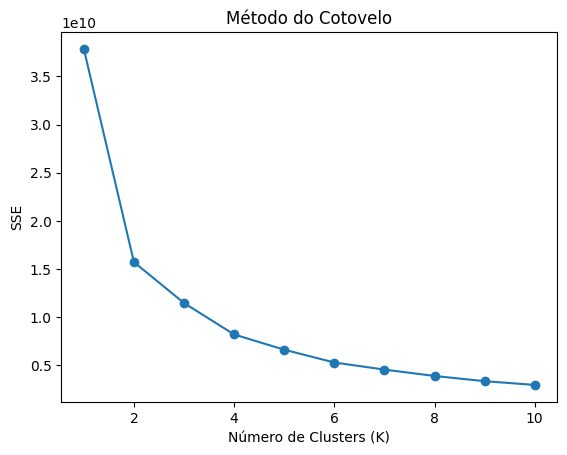

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_live)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')
plt.show()

# Pré-processamento

No começo do projeto realizei a limpeza de dados da tabela como os valores em faltas, as colunas que estavam a mais, e lidei com variaveis categóricas. Porém meus dados possui uma dimensionalidade muito grande,ou seja, o meu modelo possui **overfitting** no qual preciso realizar uma redução de dimensionalidade nos meus dados para realizar o **K-means** de uma forma mais efeciente.

In [ ]:
import pandas as pd

df_reduced = df_live.head(88)

print(df_reduced)



    status_id  status_type  num_reactions  num_comments  num_shares  \
0           1            3            529           512         262   
1           2            1            150             0           0   
2           3            3            227           236          57   
3           4            1            111             0           0   
4           5            1            213             0           0   
..        ...          ...            ...           ...         ...   
83         84            3            392           461          47   
84         85            3            310           540          41   
85         86            1             14             3           0   
86         87            1            293             6           1   
87         88            1            236            12           0   

    num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0         432         92         3          1         1           0  
1      

### K-Means from Scratch
Nesta etapa iremos utilizar o algoritmo do k-means. Neste algoritmo selecionamos 3 clusters de acordo com a análise feita anteriormente do método do Elbow.

,num_comments,num_likes
b,6.500000,111.088235
r,326.642857,245.071429
y,76.769231,186.038462


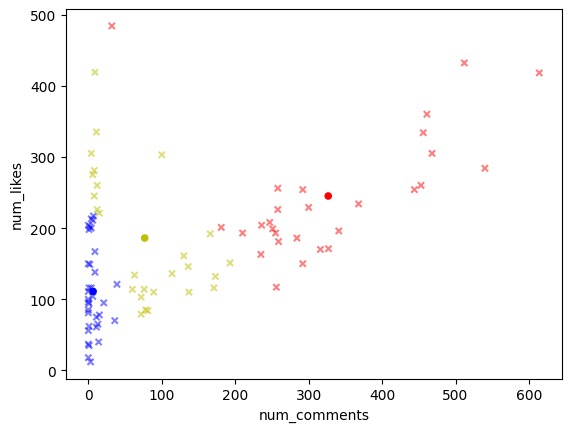

In [ ]:
import numpy as np
import pandas as pd

X_train = df_reduced[["num_comments", "num_likes"]]

centroids = pd.DataFrame({"num_comments": [300, 20, 100],
                          "num_likes": [250, 70, 100]},
                         index=["r", "b", "y"])

centroids.index = ["r", "b", "y"]

def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

clusters = X_train.apply(get_nearest_centroid, axis=1)

centroids = X_train.groupby(clusters).mean()

ax = X_train.plot.scatter(x="num_comments", y="num_likes",
                          c=clusters, marker="x", alpha=.5)

centroids.plot.scatter(x="num_comments", y="num_likes",
                       c=centroids.index, ax=ax)
centroids

#### 2º Modelo - Clusterização Hierárquica
##### Dendrograma
Iremos realizar o dendograma para poder analisar como os agrupamentos são formados em cada passo e para avaliar os níveis de similaridade (ou distância) dos agrupamentos que são formados.

In [ ]:
df_reduced2 = df_live.sample(frac=0.0125)

print(df_reduced2)

      status_id  status_type  num_reactions  num_comments  num_shares  \
6937       6938            3            173          1773         105   
5138       5139            3             62           102          76   
5972       5973            1             30             8           0   
5584       5585            1             24             1           0   
5492       5493            1            477             3           0   
...         ...          ...            ...           ...         ...   
6805       6806            1             16            11           0   
6514       6515            1             46             4           0   
2121       2122            1             26            11           0   
3104       3105            1             11             0           0   
4627       4628            1            392           133           2   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
6937        153         17         1          1    

In [ ]:
import pandas as pd

X = pd.DataFrame({'status_type':df_reduced2.iloc[:, 1]})
X.head()

,status_type
6937,3
5138,3
5972,1
5584,1
5492,1


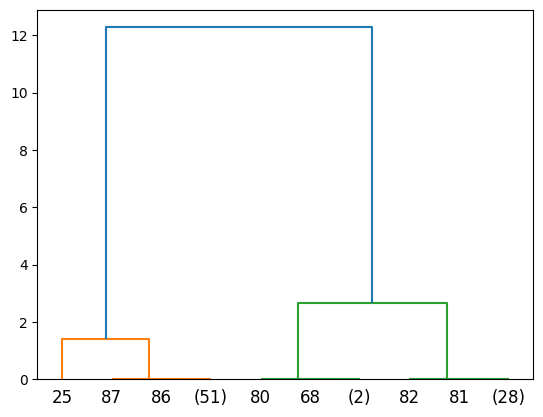

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

dendrogram(linkage(X, 'ward'), truncate_mode= 'level', p=3)

plt.show()


Ao analisar o dendrigrama podemos identificar que o eixo do x representa o identificador de cada número de **status_id**. Entretanto quando os valores apresentam-se entre parenteses, representa o total de números de **status_id** que aquela ramificação possui.

## Melhorias na precisão dos Modelos

Não foi preciso realizar melhorias de precisão dos modelos, pois o modelo atende aos requisitos, isto é, os modelos de clustering estão a atingir os níveis desejados de precisão e atendendo aos requisitos do projeto, isso significa que os modelos atuais estão satisfatórios e não há necessidade imediata de buscar melhorias na precisão. Assim sendo, conseguimos melhorar a precisão dos modelos resolvendo o problema de overfitting.

## Resultados de Validação dos Modelos de ML desenvolvidos
Neste tópico iremos realizar a validação dos modelos desenvolvidos anteriormente na qual utilizaremos a Matriz de Confusão para ambos os modelos.
As matrizes de confusão são uma representação visual dos resultados do modelo, mostrando a contagem ou a proporção de instâncias classificadas corretamente e incorretamente para cada classe. Elas são especialmente úteis em problemas de classificação multiclasse.

#### Matriz de Confusão

#### Matriz de Confusão para o modelo de Dendrograma

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df_reduced['status_type']
X = df_reduced.drop('status_type', axis=1)

X.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,2,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,4,111,0,0,111,0,0,0,0,0
4,5,213,0,0,204,9,0,0,0,0


##### Partion Data into Train and Test

In [ ]:
X_train2, X_teste, y_train, y_test = train_test_split(X, y, random_state=0)

##### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train2, y_train)

LogisticRegression(max_iter=1000, random_state=42)

##### Make Prediction on **Test Data**

In [ ]:
y_test_pred = lr.predict(X_teste)

y_test_pred

array([3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3])

##### Confusion Matrix

In [ ]:
lr.classes_

array([1, 3])

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels= lr.classes_)

print(cm)

[[ 7  0]
 [ 2 13]]


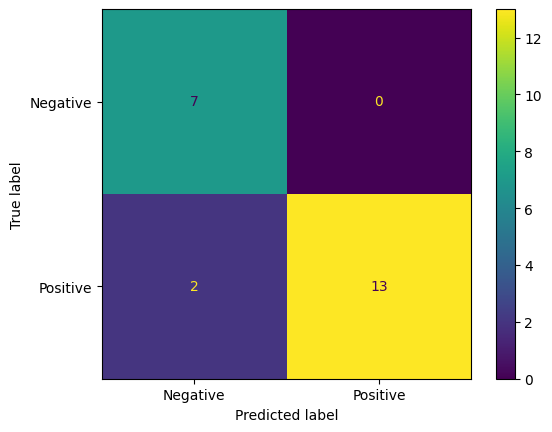

In [ ]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Negative','Positive'])

cm_disp.plot()

In [ ]:
import numpy as np

accuracy = (cm.diagonal().sum()) / cm.sum()

print('Accuracy: {0:0.2f}'.format(accuracy))

Accuracy: 0.91


#### Matriz de Confusão para o Modelo K-Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_reduced.loc[df_reduced['num_comments'] > 0, 'Target'] = 1
df_reduced.loc[df_reduced['num_comments'] <= 0, 'Target'] = 0


df_reduced.head()

<ipython-input-21-07c79777cf82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.loc[df_reduced['num_comments'] > 0, 'Target'] = 1


,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Target
0,1,3,529,512,262,432,92,3,1,1,0,1.0
1,2,1,150,0,0,150,0,0,0,0,0,0.0
2,3,3,227,236,57,204,21,1,1,0,0,1.0
3,4,1,111,0,0,111,0,0,0,0,0,0.0
4,5,1,213,0,0,204,9,0,0,0,0,0.0


#### Criar nosso X e Y

In [ ]:
x = df_reduced.iloc[0: ,3].values.reshape(-1,1)
y = (df_reduced.Target == 1).astype(int)

#### Vamos dividir nossos dados em conjuntos de teste e treinamento e, em seguida, começar a construir nosso modelo de regressão logística

In [ ]:
from sklearn.model_selection import train_test_split

x_train3, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size=0.20, random_state=0)

#### Antes de criarmos nosso classificador, precisaremos normalizar os dados (escala de recursos) usando a função de utilidade StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train3 = sc_x.fit_transform(x_train3)
x_test2 = sc_x.transform(x_test2)

#### Agora estamos prontos para construir nosso Classificador Logístico

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=0)
logit.fit(x_train3, y_train2)

y_predicted2 = logit.predict(x_test2)

#### Agora, vamos avaliar nosso classificador com a matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test2, y_predicted2)
print(cm2)

[[ 0  2]
 [ 0 16]]


#### Agora iremos construir o gráfico da matriz de confusão, para deixar mais apresentavel

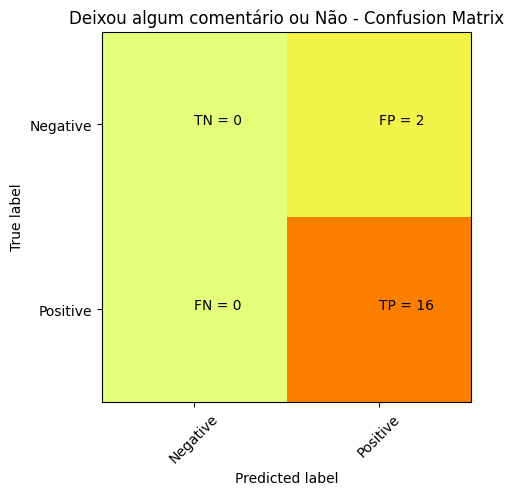

In [ ]:
plt.clf()
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Deixou algum comentário ou Não - Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ " = "+str(cm2[i][j]))
plt.show()

In [ ]:
accuracy = (cm2.diagonal().sum()) / cm2.sum()

print('Accuracy: {0:0.2f}'.format(accuracy))

Accuracy: 0.89


# Discusão

Por fim, passamos à interpretação e comparação dos resultados, para tal, separámos a discussão em 2 tópicos, o primeiro a avaliação da qualidade dos modelos, seguido pela interpretação dos gráficos. Os objetos da interpretação foram os modelos de clustering k-means com centroides e clustering hierárquico, desenvolvidos utilizando o conjunto de dados Facebook Live Sellers da Tailândia. Em adenda, é de ressaltar um diferença entre o desempenho computacional entre ambos os modelos, temos que o modelo k-means, com a incrementação do conjunto de dados, vai tornar a interpretação dos mesmos um pouco mais fácil, indicando uma escalabilidade do modelo moderada, o que não se verifica para o modelo de clustering hierárquicos dado que neste modelo apenas utilizamos a distância entre pontos de dados onde a quantidade dos dados acaba por impactar na leitura dos resultados, reforçando assim, como no ponto seguinte, que o modelo do k-means se ajusta melhor aos nossos dados.

Começando pela avaliação da qualidade dos clusters, para avaliar a qualidade dos clusters desenvolvemos uma matriz de confusão com o objetivo de adquirir os valores de *accuracy* que nos indica a precisão do modelo entre os valores previstos e os valores reais. No caso do modelo de clustering k-means, o valor de accuracy obtido foi de 0.89, demonstrando uma precisão de 89% e para o modelo de clustering hierárquico obtivemos um valor de accuracy de 0.91, indicando uma precisão de 91%. Dados os resultados, mesmo os valores de *accuracy* do cluster hierárquico ser superior ao do k-means, esses valores são muito próximos não tendo muita disparidade entre valores, portanto podemos concluir que, neste requisito, o modelo de k-means é superior.

Passando à interpretação dos gráficos, no gráfico do clustering k-means podemos identificar os 3 clusters, sendo o cluster azul correspondente ao aglomerado de dados que possui um valor moderado de **likes**, em média de 200, porém não possui **comentários**. Existe também o cluster amarelo que representa a aglomeração dos dados, no qual existem uma quantidade signifcativa de mais de 200 **likes** e também possui valores moderados de **comentários**, isto é, quanto mais likes um post, consequentemente maior será o número de **comentários**, no qual podemos confirmar essa analise na observação do cluster vermelho, que nos indica essa confirmação, de que quanto mais **comentários** um post tiver mais **likes** terá e vice-versa. Já no gráfico obtido através do clustering hierárquico, o dendrograma, temos o eixo y a representar a dissimilaridade entre os pontos de dados onde quanto maior a distância, maior a dissimilaridade entre os pontos de dados. Ao observar o dendrograma podemos inferir que os dois clusters pode ser um número ideal para o nosso conjunto de dados uma vez que, quando o gráfico se ramifica pela segunda vez, existe pouca distância entre a ramificação seguinte, indicando que os dados apresentam cada vez mais semelhanças, com esta inferência podemos concluir que, para os nossos 4 tipos de **status_type**, apenas existem 2 aglomerados de dados para o nosso conjunto.

# Apreciação global do projeto

A escolha do tema do projeto baseou-se no fascínio por uma das plataformas de media social mais populares do mundo: o Facebook. Acreditámos que compreender e analisar o envolvimento nas páginas de vendedores tailandeses de moda e cosméticos seria uma forma interessante e relevante de explorar os dados disponíveis nesta plataforma. Com base nessa motivação, embarcámos nesta jornada de recolha de dados, análise e descoberta de insights, com o objetivo de proporcionar uma compreensão mais profunda do comportamento dos utilizadores do Facebook e do envolvimento nas páginas de vendedores tailandeses, neste contexto específico.
As ferramentas utilizadas para este projeto foi o jupyter notebook, no Jupyter Notebook, foram também utilizadas inúmeras bibliotecas como por exemplo, o **pandas**, o **sklearn**, o **numpy**, o **matplotlib**, entre outras bibliotecas.

Neste trabalho houve algumas dificuldade, como por exemplo na parte de redução dos dados, no qual foi muito trabalhoso achar o tamanho adequado dos dados que poderiamos utilizar para a continuação do trabalho, uma outra dificuldade foi na parte da matriz de confusão, essa dificuldade foi na parte do código, no qual não sabiamos muito bem o que suposto fazer, perdemos muito tempo a procura de videos ou documentos que nos ajudasse a realizar tal código. Essas dificuldades foram superadas com muito esforço de pesquisa e com a excelente ajuda do professor, no qual nos ajudou a tirar todas as nossas duvidas tanto nas aulas quanto por e-mails.

Em resumo, este projeto teve um impacto significativo na nossa compreensão do envolvimento nas páginas do Facebook de vendedores tailandeses de moda e cosméticos. Ao explorar os dados e realizar análises, obtivemos insights valiosos sobre os padrões de interação dos utilizadores, o desempenho das diferentes formas de publicações e as métricas de envolvimento mais relevantes, como comentários, partilhas e reações. Além disso, também adquirimos um entendimento mais profundo sobre o funcionamento da ferramenta Jupyter Notebook e expandimos o nosso conhecimento na área de Aprendizagem Automática, que é um setor em grande desenvolvimento na área da Tecnologia. Fomos capazes de aplicar todo o conhecimento adquirido em aula neste projeto, o que nos proporcionou uma experiência prática valiosa.